In [1]:
import moxing as mox
import os
mox.file.shift('os', 'mox')

INFO:root:Using MoXing-v1.15.1-3fc51aac
INFO:root:Using OBS-Python-SDK-3.1.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

INFO:matplotlib.font_manager:font search path ['/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf', '/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/afm', '/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
INFO:matplotlib.font_manager:generated new fontManager


In [5]:
!pip install EMD-signal

    100% |████████████████████████████████| 163kB 76.0MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 62.5MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 89.6MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 22.3MB/s ta 0:00:01
    100% |████████████████████████████████| 1.6MB 113.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for pathos ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/43/37/fd/8e8176ce272909725259bba231ce69c71aab4f0e2df19cc82e
  Running setup.py bdist_wheel for ppft ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/35/3a/66/94ae173e31492f97cf38feb3eda9934d66a3c6c86748cde0a1
  Running setup.py bdist_wheel for dill ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/2a/ff/6f/cabf21a89791c75def5605f6b217e936b67d9f659e8c64f4f8
  Running setup.py bdist_wheel for pox ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/8d/b6/36/0121e2f590b5bfc49d4163b09333485d11592eda8d59

In [3]:
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
from scipy import linalg
import scipy.ndimage as ndimage

In [7]:
from __future__ import division, print_function
from PyEMD import EEMD

# Winter SCF

1966 example

In [7]:
import glob
#获取指定目录下的所有图片
path_list = glob.glob('obs://scf-construct-gl/EASE_Grid_Data_arr/*.npy')

INFO:root:Listing OBS: 1000
INFO:root:Listing OBS: 2000


In [8]:
path_list[0]

'obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19661003-19661009.v04.npy'

In [9]:
selectedstart = [path for path in path_list if int(path[62:-17])>19721031]
selectedend = [path for path in selectedstart if int(path[71:-8])<19730430]

In [10]:
selectedend

['obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19721106-19721112.v04.npy',
 'obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19721113-19721119.v04.npy',
 'obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19721120-19721126.v04.npy',
 'obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19721127-19721203.v04.npy',
 'obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19721204-19721210.v04.npy',
 'obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19721211-19721217.v04.npy',
 'obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19721218-19721224.v04.npy',
 'obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19721225-19721231.v04.npy',
 'obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19730101-19730107.v04.npy',
 'obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19730108-19730114.v04.npy',
 'obs://scf-construct-gl/EASE_Grid_Data_arr/EASE2_N25km.snowice.19730115-1973012

In [11]:
len(selectedend)

25

In [30]:
winter = np.zeros((52,720,720))
for i in range(52):
    Y = i+1967
    start = int(str(Y-1)+'1031')
    end = int(str(Y)+'0430')
    selectedstart = [path for path in path_list if int(path[62:-17])>start]
    selectedend = [path for path in selectedstart if int(path[71:-8])<end]
    yearlysce = np.zeros((len(selectedend),720,720))
    for j,select in enumerate(selectedend):
        yearlysce[j] = np.load(select)
    yearlysce = np.where((yearlysce ==1) | (yearlysce ==5),1,0)
    print(yearlysce.shape)
    winter[i] = (yearlysce.sum(axis = 0))*1.0/len(selectedend)*100

(24, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(24, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(24, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(24, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(24, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(25, 720, 720)
(24, 720, 720)
(25, 720, 720)


In [31]:
winter.shape

(52, 720, 720)

In [34]:
np.histogram(winter[0])

(array([435528,   3326,   5075,   2868,   3270,   4904,   4554,   7190,
          7394,  44291]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

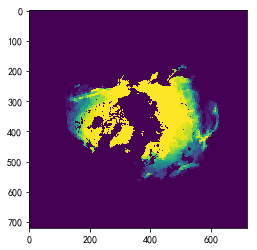

In [32]:
plt.imshow(winter[10])

In [33]:
np.save('obs://ltsa-eemd/winterscf/winterscf.npy',winter)

# load data

In [4]:
winter = np.load('obs://ltsa-eemd/winterscf/winterscf.npy')

In [5]:
winter.shape

(52, 720, 720)

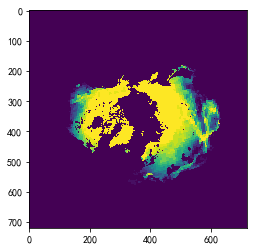

In [6]:
plt.imshow(winter[0])

In [7]:
wscf =winter.reshape(52,720*720)

In [8]:
wscf.shape

(52, 518400)

In [9]:
wscfn = wscf.mean(axis =0, keepdims=True)

In [10]:
wscfn.shape

(1, 518400)

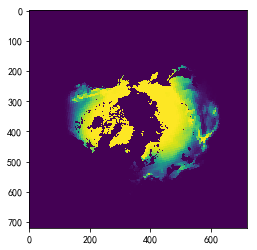

In [11]:
plt.imshow(wscfn.reshape(720,720))
plt.show()

In [12]:
wscfa = wscf-wscfn

In [13]:
wscfa.shape

(52, 518400)

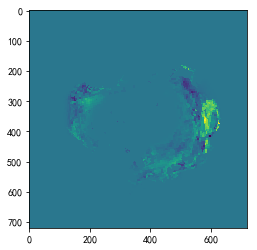

In [14]:
plt.imshow(wscfa[0].reshape(720,720))
plt.show()

In [15]:
wscfa.max()

86.63141025641025

In [16]:
wscfa.max(axis = 1)

array([86.63141026, 73.09935897, 69.19871795, 65.19871795, 72.81410256,
       43.60576923, 52.36538462, 64.76282051, 46.15384615, 36.21153846,
       36.81410256, 53.64423077, 45.53846154, 35.29807692, 66.27884615,
       61.76923077, 44.81410256, 42.98397436, 46.09294872, 39.66346154,
       47.26602564, 47.92307692, 39.51923077, 33.7724359 , 36.25      ,
       43.26602564, 40.23397436, 45.54166667, 46.66346154, 58.45833333,
       34.95512821, 71.66346154, 51.86858974, 64.64423077, 44.84935897,
       66.82051282, 47.18910256, 32.40384615, 56.62820513, 45.00320513,
       44.07692308, 50.93269231, 40.81410256, 41.73076923, 49.63782051,
       52.66025641, 66.93269231, 58.93269231, 70.93269231, 78.93269231,
       53.76602564, 78.93269231])

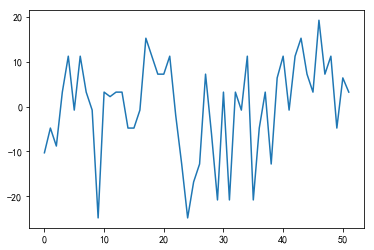

In [17]:
plt.plot(wscfa[:,179784])

# linear fit

In [18]:
wscfa.shape

(52, 518400)

In [21]:
wscfa.shape[0]

52

In [29]:
x = np.arange(1967,2019)
slope = np.zeros((518400))
for i in range(518400):
    y = wscfa[:,i]
    m,b = np.polyfit(x,y,1)
    slope[i] = m

In [30]:
slope.shape

(518400,)

In [31]:
linear_trend = slope.reshape(720,720)

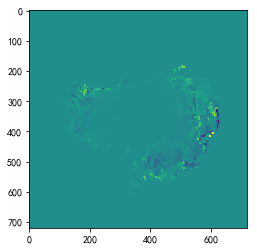

In [32]:
plt.imshow(linear_trend)
plt.show()

In [33]:
np.save('obs://ltsa-eemd/linear-trend/linear_trend.npy',linear_trend)

## LTSA

In [92]:
# for i in range(25,50):
#     embedding = LocallyLinearEmbedding(n_neighbors = i, n_components=i, method='ltsa')
#     wscfa_trans = embedding.fit_transform(wscfa)
#     w,resid,rank,sigma= linalg.lstsq(wscfa_trans,wscfa) 
#     No_IMFs = np.zeros(i)
#     for j in range(i):
#         eIMFs = eemd.eemd(wscfa_trans[:,j])
#         nIMFs = eIMFs.shape[0]
#     #     plt.figure(figsize=(15,3*46))
#     #     plt.subplot(46,1,i+1)
#     #     plt.plot(t,eIMFs[-1])
#     #     plt.ylabel("%d th IMFs4 "%i)
#     #     plt.show()
#         No_IMFs[j] = nIMFs
#     print(np.unique(No_IMFs,return_counts = True))

(array([4., 5.]), array([ 7, 18]))
(array([4., 5.]), array([ 7, 19]))
(array([4., 5.]), array([11, 16]))
(array([4., 5.]), array([ 4, 24]))
(array([4., 5.]), array([ 5, 24]))
(array([4., 5., 6.]), array([ 5, 24,  1]))
(array([4., 5.]), array([ 7, 24]))
(array([4., 5.]), array([ 9, 23]))
(array([4., 5.]), array([ 9, 24]))
(array([4., 5.]), array([ 9, 25]))
(array([4., 5.]), array([15, 20]))
(array([4., 5.]), array([ 9, 27]))
(array([4., 5., 6.]), array([11, 25,  1]))
(array([4., 5.]), array([13, 25]))
(array([4., 5., 6.]), array([ 9, 29,  1]))
(array([4., 5., 6.]), array([13, 26,  1]))
(array([4., 5.]), array([ 9, 32]))
(array([4., 5.]), array([12, 30]))
(array([4., 5.]), array([10, 33]))
(array([4., 5.]), array([11, 33]))
(array([4., 5.]), array([12, 33]))
(array([4., 5.]), array([13, 33]))
(array([4., 5.]), array([ 9, 38]))
(array([4., 5.]), array([14, 34]))
(array([4., 5.]), array([10, 39]))


In [22]:
embedding = LocallyLinearEmbedding(n_neighbors = 50, n_components=50, method='ltsa')

In [23]:
wscfa_trans = embedding.fit_transform(wscfa)

In [24]:
wscfa_trans.shape     # [n_samples, n_features]

(52, 50)

In [25]:
wscfa_trans

array([[-0.07843055, -0.3246053 , -0.00754716, ...,  0.17055944,
         0.3927139 ,  0.72389478],
       [ 0.3484629 , -0.2034686 ,  0.23521042, ...,  0.52704604,
        -0.56782428, -0.04244688],
       [-0.07843055,  0.08857729,  0.00117823, ...,  0.00930652,
         0.03172659, -0.0365134 ],
       ...,
       [ 0.07079802,  0.01645617,  0.00948105, ...,  0.01029783,
         0.01789067,  0.02971714],
       [-0.07843055,  0.08857729,  0.00117823, ...,  0.00930652,
         0.03172659, -0.0365134 ],
       [-0.07843055,  0.08857729,  0.00117823, ...,  0.00930652,
         0.03172659, -0.0365134 ]])

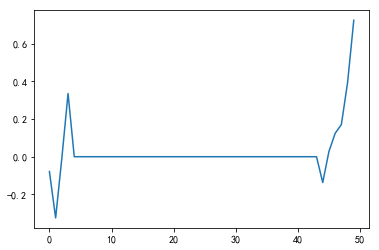

In [26]:
plt.plot(wscfa_trans[0])

In [27]:
w,resid,rank,sigma= linalg.lstsq(wscfa_trans,wscfa) 

In [28]:
w.shape      # weights matrix for inverse transform

(50, 518400)

In [29]:
reconstruction = np.dot(wscfa_trans, w)

In [30]:
reconstruction.shape    #[n_samples, n_features]

(52, 518400)

In [31]:
reconstruction.max(axis =1)   ## reconstruction is same with no sorted pcs

array([79.70259242, 62.65621038, 56.93047666, 46.86707449, 60.18339007,
       38.49071452, 52.5737585 , 54.42258733, 49.24918986, 35.8517822 ,
       44.62671771, 54.37828088, 49.82369813, 36.62671771, 63.05564186,
       54.37241725, 52.62671771, 48.32226878, 46.63531139, 44.32226878,
       47.0619473 , 49.44980165, 40.86983648, 38.64900239, 36.97452919,
       43.0619473 , 40.29029654, 46.53306911, 44.39868296, 60.18896478,
       38.47079101, 68.45195434, 47.81354304, 62.74779251, 44.86200375,
       70.22538043, 48.74121032, 32.76450327, 55.4692023 , 50.50422353,
       41.86729418, 47.53143577, 41.93925262, 43.66941749, 48.29444296,
       53.9589334 , 71.1193485 , 65.45560831, 68.22742113, 76.22742113,
       57.94663807, 83.11330474])

In [32]:
reconstruction.mean(axis = 1)

array([ 3.13546083e-01, -6.83462589e-01,  3.96463943e-02, -1.18993624e-01,
        2.24245160e-01,  6.25090486e-02, -9.57316921e-02, -1.85129605e-01,
       -3.64449812e-01, -4.90338174e-01,  4.49020402e-02,  4.46937739e-01,
        2.66938061e-01, -6.91025894e-02, -4.73576241e-01, -9.00758279e-02,
        2.11906205e-02,  9.18927810e-02,  2.35070777e-01,  4.54670559e-01,
        2.48042472e-01, -1.02266170e-01, -2.78066710e-01, -3.94866478e-01,
       -2.37651972e-01, -2.64866478e-01,  8.48557439e-02,  2.01283213e-01,
       -1.50056887e-02,  1.08732461e-02, -4.92049063e-03,  2.48224350e-01,
       -1.59349503e-01, -9.53680215e-02,  5.34756287e-04, -3.33084071e-01,
        4.43713769e-01, -3.86704906e-02,  9.13758057e-02, -1.38806859e-01,
       -3.64773886e-01,  2.03742666e-01, -1.57621108e-01,  3.87918392e-01,
        1.48064604e-01,  3.06366154e-01,  3.63333791e-01,  7.99155054e-02,
        5.39606822e-02, -9.49822190e-02,  2.43539463e-01, -5.98057662e-02])

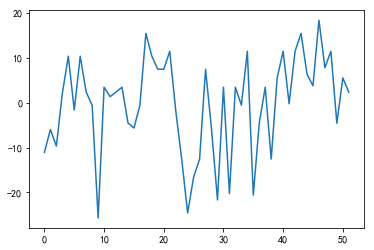

In [33]:
plt.plot(reconstruction[:,179784])

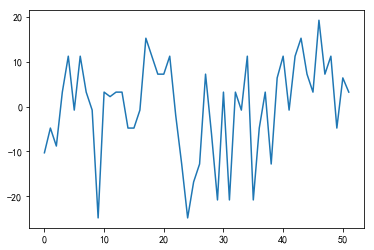

In [34]:
plt.plot(wscfa[:,179784])

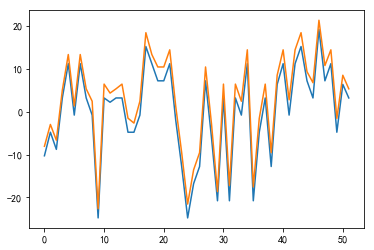

In [35]:
plt.plot(wscfa[:,179784])
plt.plot(reconstruction[:,179784]+3)

## EEMD

In [36]:
eemd = EEMD()
emd = eemd.EMD
emd.extrema_detection="parabol"

In [37]:
t = np.arange(1967,2019)

In [38]:
t

array([1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [39]:
len(t)

52

In [40]:
wscfa_trans[:,0].shape

(52,)

In [87]:
eIMFs_ex = eemd.eemd(wscfa_trans[:,0])

In [88]:
eIMFs_ex.shape

(5, 52)

In [41]:
No_IMFs = np.zeros(50)
for i in range(50):
    eIMFs = eemd.eemd(wscfa_trans[:,i])
    nIMFs = eIMFs.shape[0]
#     plt.figure(figsize=(15,3*46))
#     plt.subplot(46,1,i+1)
#     plt.plot(t,eIMFs[-1])
#     plt.ylabel("%d th IMFs4 "%i)
#     plt.show()
    No_IMFs[i] = nIMFs
print(No_IMFs)

[5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 4. 5. 4. 5. 5.
 5. 4. 5. 4. 5. 5. 5. 5. 4. 5. 4. 4. 4. 5. 5. 4. 5. 5. 4. 4. 5. 4. 5. 5.
 5. 5.]


In [43]:
np.unique(No_IMFs,return_counts=True)

(array([4., 5.]), array([14, 36]))

5 components example

In [43]:
eIMFs = eemd.eemd(wscfa_trans[:,0])
nIMFs = eIMFs.shape[0]
nIMFs

5

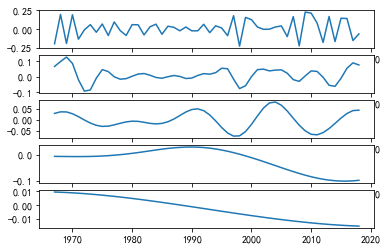

In [46]:
for i in range(nIMFs):
    plt.subplot(nIMFs,1,i+1)
    plt.plot(t,eIMFs[i])

In [47]:
eIMFs = eemd.eemd(wscfa_trans[:,1])
nIMFs = eIMFs.shape[0]
nIMFs

5

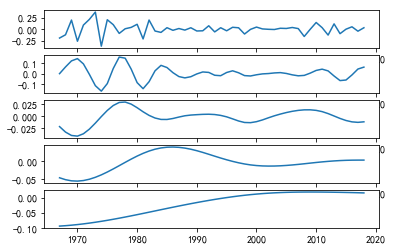

In [48]:
for i in range(nIMFs):
    plt.subplot(nIMFs,1,i+1)
    plt.plot(t,eIMFs[i])

In [62]:
eIMFs = eemd.eemd(wscfa_trans[:,1])
nIMFs = eIMFs.shape[0]
nIMFs

5

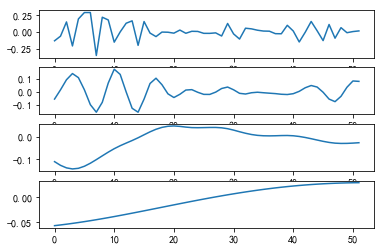

In [63]:
plt.subplot(4,1,1)
plt.plot(eIMFs[0])
plt.subplot(4,1,2)
plt.plot(eIMFs[1])
plt.subplot(4,1,3)
plt.plot(eIMFs[2]+eIMFs[3])
plt.subplot(4,1,4)
plt.plot(eIMFs[-1])


4 componets example

In [65]:
eIMFs = eemd.eemd(wscfa_trans[:,7])
nIMFs = eIMFs.shape[0]
nIMFs

4

In [67]:
eIMFs.shape

(4, 52)

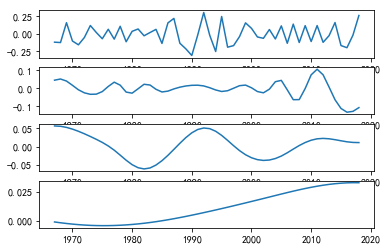

In [50]:
for i in range(nIMFs):
    plt.subplot(nIMFs,1,i+1)
    plt.plot(t,eIMFs[i])

In [47]:
# 当nIMFs = 4时，IMFs3 复制前一个的
IMFs = np.zeros((5,52,50), dtype=np.float32)
for i in range(50):
    eIMFs = eemd.eemd(wscfa_trans[:,i])
    nIMFs = eIMFs.shape[0]
    if nIMFs < 5:
        IMFs[0:3,:,i] = eIMFs[0:3]
        IMFs[3,:,i] = IMFs[3,:,i-1]
        IMFs[4,:,i] = eIMFs[-1]
    else:
        IMFs[:,:,i] = eIMFs
    no_pro = i+1
    print("="*no_pro+'>'+'%d/50'%(i+1))

=>1/50
==>2/50
===>3/50
====>4/50
=====>5/50
======>6/50
=======>7/50
========>8/50
=========>9/50
==========>10/50
===========>11/50
============>12/50
=============>13/50
==============>14/50
===============>15/50
================>16/50
=================>17/50
==================>18/50
===================>19/50
====================>20/50
=====================>21/50
======================>22/50
=======================>23/50
========================>24/50
=========================>25/50
==========================>26/50
===========================>27/50
============================>28/50
=============================>29/50
==============================>30/50
===============================>31/50
================================>32/50
=================================>33/50
==================================>34/50
===================================>35/50
====================================>36/50
=====================================>37/50
======================================>38/50
==

In [72]:
# # 当nIMFs = 5时，舍弃eIMFs[3]
# IMFs = np.zeros((4,52,50), dtype=np.float32)
# for i in range(50):
#     eIMFs = eemd.eemd(wscfa_trans[:,i])
#     nIMFs = eIMFs.shape[0]
#     if nIMFs > 4:
#         IMFs[0:3,:,i] = eIMFs[0:3]
#         IMFs[3,:,i] = eIMFs[-1]
#     else:
#         IMFs[:,:,i] = eIMFs
#     no_pro = i+1
#     print("="*no_pro+'>'+'%d/50'%(i+1))

=>1/50
==>2/50
===>3/50
====>4/50
=====>5/50
======>6/50
=======>7/50
========>8/50
=========>9/50
==========>10/50
===========>11/50
============>12/50
=============>13/50
==============>14/50
===============>15/50
================>16/50
=================>17/50
==================>18/50
===================>19/50
====================>20/50
=====================>21/50
======================>22/50
=======================>23/50
========================>24/50
=========================>25/50
==========================>26/50
===========================>27/50
============================>28/50
=============================>29/50
==============================>30/50
===============================>31/50
================================>32/50
=================================>33/50
==================================>34/50
===================================>35/50
====================================>36/50
=====================================>37/50
======================================>38/50
==

In [48]:
IMFs.shape

(5, 52, 50)

In [50]:
IMFs1 = IMFs[0]
IMFs2 = IMFs[1]
IMFs3 = IMFs[2]
IMFs4 = IMFs[3]
IMFs5 = IMFs[4]

In [51]:
IMFs1.shape

(52, 50)

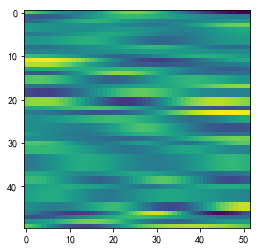

In [52]:
plt.imshow(IMFs4.T)
plt.show()

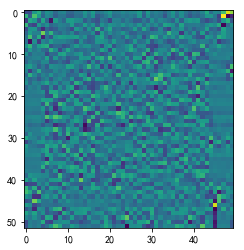

In [53]:
plt.imshow(IMFs1)
plt.show()

## Inverse transform

In [58]:
IIMFs1 = np.dot(IMFs1, w).reshape(52,720,720)
IIMFs2 = np.dot(IMFs2, w).reshape(52,720,720)
IIMFs3 = np.dot(IMFs3, w).reshape(52,720,720)
IIMFs4 = np.dot(IMFs4, w).reshape(52,720,720)
IIMFs5 = np.dot(IMFs5, w).reshape(52,720,720)

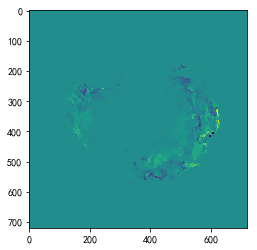

In [61]:
plt.imshow(IIMFs5[0])
plt.show()

In [60]:
np.save('obs://ltsa-eemd/IMFs/IMFs1.npy',IIMFs1)
np.save('obs://ltsa-eemd/IMFs/IMFs2.npy',IIMFs2)
np.save('obs://ltsa-eemd/IMFs/IMFs3.npy',IIMFs3)
np.save('obs://ltsa-eemd/IMFs/IMFs4.npy',IIMFs4)
np.save('obs://ltsa-eemd/IMFs/IMFs5.npy',IIMFs5)

## IMF4 Trend

In [87]:
IIMFs5.shape

(52, 720, 720)

In [88]:
IMFs5_trend = IIMFs5 - IIMFs5[0]

In [90]:
IMFs5_trend.shape

(52, 720, 720)

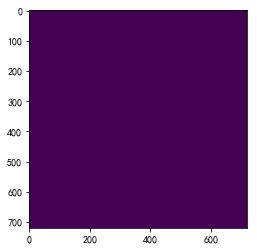

In [91]:
plt.imshow(IMFs5_trend[0])
plt.show()

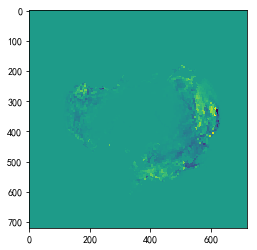

In [92]:
plt.imshow(IMFs5_trend[50])
plt.show()

In [93]:
np.save('obs://ltsa-eemd/IMFs4_trend/IMFs4_trend.npy',IMFs4_trend)

## IMF4_Changing rate

In [107]:
IMFs5_rate = np.zeros((50,720,720))
for i in range(1,51):
    IMFs5_rate[i-1] = IIMFs5[i+1]- IIMFs5[i-1]
    print("IMF4_Changing_rate [%s] is done"%i)

IMF4_Changing_rate [1] is done
IMF4_Changing_rate [2] is done
IMF4_Changing_rate [3] is done
IMF4_Changing_rate [4] is done
IMF4_Changing_rate [5] is done
IMF4_Changing_rate [6] is done
IMF4_Changing_rate [7] is done
IMF4_Changing_rate [8] is done
IMF4_Changing_rate [9] is done
IMF4_Changing_rate [10] is done
IMF4_Changing_rate [11] is done
IMF4_Changing_rate [12] is done
IMF4_Changing_rate [13] is done
IMF4_Changing_rate [14] is done
IMF4_Changing_rate [15] is done
IMF4_Changing_rate [16] is done
IMF4_Changing_rate [17] is done
IMF4_Changing_rate [18] is done
IMF4_Changing_rate [19] is done
IMF4_Changing_rate [20] is done
IMF4_Changing_rate [21] is done
IMF4_Changing_rate [22] is done
IMF4_Changing_rate [23] is done
IMF4_Changing_rate [24] is done
IMF4_Changing_rate [25] is done
IMF4_Changing_rate [26] is done
IMF4_Changing_rate [27] is done
IMF4_Changing_rate [28] is done
IMF4_Changing_rate [29] is done
IMF4_Changing_rate [30] is done
IMF4_Changing_rate [31] is done
IMF4_Changing_rat

In [108]:
IMFs5_rate.shape

(50, 720, 720)

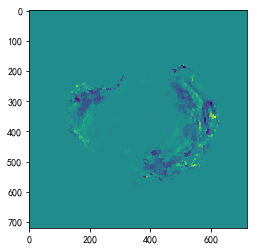

In [109]:
plt.imshow(IMFs5_rate[0])

In [110]:
np.save('obs://ltsa-eemd/IMFs4_rate/IMFs5_rate.npy',IMFs5_rate)